# 1. Importing Basic Modules for data reading and manipulation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2. Using Yahoo Finance API
[How to get stock data using yahoo finance](https://towardsdatascience.com/free-stock-data-for-python-using-yahoo-finance-api-9dafd96cad2e)

## 2.1 Importing Yahoo Finance Package 

In [2]:
#import yfinance as yf

## 2.2 Downloading historical data for a particular stock using its symbol

In [3]:
#df_tst=yf.Ticker("INFY")
#raw_data=df_tst.history(start="2012-12-01",end="2017-12-01")
#raw_data

## 2.3 Reviewing if there has been any notable actions like stock split or dividends in the said            period 

In [4]:
#df_tst.actions

## 2.4 Exporting the data in .csv format

In [5]:
#raw_data.to_csv("test.csv")

# 3 Adjusted Closing Price
[Reference](https://www.investopedia.com/terms/a/adjusted_closing_price.asp)

As demanded in the session, the Apple Stock data has been used to demonstate the caculation of adjusted prices.

In [6]:
file_name="AAPL-Copy1.csv" ## replace with file name of your data  
df=pd.read_csv(file_name) ##yf.download("INFY",start="2012-12-03",end="2017-12-01",actions="dividends")
df.head()

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2007-12-03,181.86,184.14,177.70,178.8600,34338200.0,0.0,1.0,23.371545,23.664556,22.836927,22.986003,240367400.0
1,2007-12-04,177.15,180.90,176.99,179.8100,27635700.0,0.0,1.0,22.766244,23.248171,22.745682,23.108091,193449900.0
2,2007-12-05,182.89,186.00,182.41,185.5000,31871500.0,0.0,1.0,23.503914,23.903592,23.442227,23.839335,223100500.0
3,2007-12-06,186.19,190.10,186.12,189.9528,32136100.0,0.0,1.0,23.928010,24.430500,23.919014,24.411582,224952700.0
4,2007-12-07,190.54,194.99,188.04,194.3000,38073800.0,0.0,1.0,24.487046,25.058933,24.165761,24.970258,266516600.0


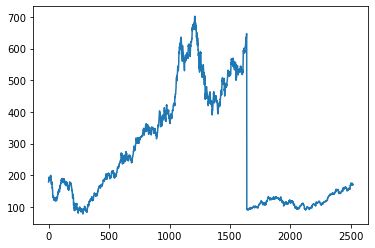

In [7]:
plt.plot(df["Close"])

In [8]:
df.shape

(2517, 13)

In [9]:
h=df.shape[0]
h

2517

In [10]:
da=[]
sa=[]
for i in range(h):
    if df["Ex-Dividend"].iloc[i]>0:
        da.append(1)
    else:
        da.append(0)
    if df["Split Ratio"].iloc[i]>0:
        sa.append(1)
    else:
        sa.append(0)      

In [11]:
ao=[]
ah=[]
al=[]
ac=[]

for p in range(h):
    ao.append(df["Open"].iloc[p])
    ah.append(df["High"].iloc[p])
    al.append(df["Low"].iloc[p])
    ac.append(df["Close"].iloc[p])


[Reference](https://help.yahoo.com/kb/SLN28256.html#:~:text=Adjusted%20close%20is%20the%20closing,Security%20Prices%20(CRSP)%20standards.)

In [ ]:
for j in range(h):
    k=0
    l=0
    if sa[j]==1:
        if j>0:
            for k in range(j):
                ao[k]=ao[k]/df["Split Ratio"].iloc[j]
                ah[k]=ah[k]/df["Split Ratio"].iloc[j]
                al[k]=al[k]/df["Split Ratio"].iloc[j]
                ac[k]=ac[k]/df["Split Ratio"].iloc[j]
        else:
            pass                 ## No need for adjust prices if only the starting date of the data taken has the actions.
    if da[j]==1:
        if j>0:
            f1=1-(df["Ex-Dividend"].iloc[j]/df["Close"].iloc[j])
            f2=1-(df["Ex-Dividend"].iloc[j]/df["Open"].iloc[j])
            f3=1-(df["Ex-Dividend"].iloc[j]/df["High"].iloc[j])
            f4=1-(df["Ex-Dividend"].iloc[j]/df["Low"].iloc[j])
            for l in range(j):
                ao[l]=ao[l]*f2
                ah[l]=ah[l]*f3
                al[l]=al[l]*f4
                ac[l]=ac[l]*f1
        else:
            pass
df["Calc. Adj. Open"]=ao        
df["Calc. Adj. High"]=ah
df["Calc. Adj.Low"]=al
df["Calc. Adj. Close"]=ac

#differences

df["% Error"]=abs(df["Calc. Adj. Close"]-df["Adj. Close"])*100/df["Adj. Close"]

In [ ]:
df.head()

In [ ]:
df.to_csv("Calculated_Adjused_Prices.csv")